Прогноз погоды позволяет людям не только планировать свое время, но и заниматься масштабными делами, такими как посев култур, строительство и др. Именно поэтому я выбрал <br>
<a href="https://www.kaggle.com/jsphyg/weather-dataset-rattle-package" >dataset</a><br>
в котором описана погода

In [265]:
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell  #to run all statements in cell, not only the last
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import preprocessing
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC


<h3>
 1-4.Поиск и выбор набора данных для построения моделей машинного обучения.<br>
Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.<br>
Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных.<br>
Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.<h3>

In [180]:
data = pd.read_csv('C:\\Users\\dimag\\Desktop\\Mash_learning\\course\\weatherAUS.csv')
#RISK_MM удаляем для проведения обучения (совет создателя датасета).<br>
data = data.drop(['RISK_MM'], axis=1)
data.head(10)
data.shape #Размер данных
data.isnull().sum() #Проверим нулевые значения
data.describe() # Основные статистические характеристки набора данных

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


(142193, 23)

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [181]:
#1)Удалим колонки Evaporation, Sunshine, Cloud9am, Cloud3pm так как в них более 40 процентов пропусков
#2)Удалим колонки Date, Location, так как нам не нужны дата и регион
data = data.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','Date'],axis=1)
#Попробуем исключить все строки с пропусками, посмотрим, что из этого получится.
data1 = data.dropna(axis=0, how='any')
(data1.shape, data.shape)


((112925, 17), (142193, 17))

<h5>Такой датасет нас устривает<h5>

In [182]:
data=data1
#Для большей точности удалим и аутлайнеров
from scipy import stats
z = np.abs(stats.zscore(data._get_numeric_data()))
print(z)
data= data[(z < 3).all(axis=1)]
data.shape
data.head()

[[0.11756741 0.10822071 0.20666127 ... 1.14245477 0.08843526 0.04787026]
 [0.84180219 0.20684494 0.27640495 ... 1.04184813 0.04122846 0.31776848]
 [0.03761995 0.29277194 0.27640495 ... 0.91249673 0.55672435 0.15688743]
 ...
 [1.44940294 0.23548728 0.27640495 ... 0.58223051 1.03257127 0.34701958]
 [1.16159206 0.46462594 0.27640495 ... 0.25166583 0.78080166 0.58102838]
 [0.77784422 0.4789471  0.27640495 ... 0.2085487  0.37167606 0.56640283]]


(107868, 17)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [183]:
#Теперь необходимо разобраться с категориальными колонками. Заменим их порядковым номером(целыми числами)
le = LabelEncoder()
le.fit(data.WindGustDir)
le.transform(data.WindGustDir)
data['WindGustDir']=le.transform(data.WindGustDir)

le.fit(data.WindDir3pm)
le.transform(data.WindDir3pm)
data['WindDir3pm']=le.transform(data.WindDir3pm)

le.fit(data.WindDir9am)
le.transform(data.WindDir9am)
data['WindDir9am']=le.transform(data.WindDir9am)

le.fit(data.RainToday)
le.transform(data.RainToday)
data['RainToday']=le.transform(data.RainToday)

le.fit(data.RainTomorrow)
le.transform(data.RainTomorrow)
data['RainTomorrow']=le.transform(data.RainTomorrow)

data.head()
#И затем сразу отмасштабируем наши данные. Вспомогательные признаки в данном случае не нужны
print('Масштабируем наши данные')
scaler = preprocessing.MinMaxScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data), index=data.index, columns=data.columns)
data.iloc[4:10]

LabelEncoder()

array([13, 14, 15, ...,  6,  3,  9])

LabelEncoder()

array([14, 15, 15, ...,  3, 14,  3])

LabelEncoder()

array([13,  6, 13, ...,  9,  9, 10])

LabelEncoder()

array([0, 0, 0, ..., 0, 0, 0])

LabelEncoder()

array([0, 0, 0, ..., 0, 0, 0])

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


Масштабируем наши данные


MinMaxScaler(copy=True, feature_range=(0, 1))

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4,0.628342,0.696296,0.035714,0.866667,0.465753,0.066667,0.466667,0.135135,0.428571,0.797753,0.33,0.342043,0.282974,0.502660,0.672589,0.0,0.0
5,0.550802,0.632099,0.007143,0.933333,0.671233,0.866667,0.866667,0.459459,0.523810,0.494382,0.23,0.304038,0.268585,0.577128,0.652284,0.0,0.0
6,0.542781,0.516049,0.000000,0.866667,0.589041,0.800000,0.866667,0.486486,0.523810,0.426966,0.19,0.313539,0.335731,0.510638,0.543147,0.0,0.0
7,0.366310,0.558025,0.000000,0.866667,0.383562,0.666667,0.866667,0.108108,0.357143,0.415730,0.19,0.403800,0.381295,0.462766,0.565990,0.0,0.0
8,0.419786,0.686420,0.000000,0.400000,1.000000,0.600000,0.466667,0.135135,0.619048,0.348315,0.09,0.296912,0.225420,0.515957,0.685279,0.0,1.0
9,0.510695,0.641975,0.050000,0.866667,0.287671,0.533333,0.666667,0.351351,0.214286,0.528090,0.27,0.251781,0.275779,0.563830,0.634518,1.0,0.0


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.731850,0.060468,-0.167296,0.172115,-0.065236,-0.170638,0.161147,0.158273,-0.229948,0.022874,-0.457125,-0.470082,0.901086,0.707920,0.029700,0.071057
MaxTemp,0.731850,1.000000,-0.159865,-0.224355,0.079976,-0.244770,-0.175576,0.007844,0.030035,-0.517233,-0.496843,-0.349210,-0.447246,0.883554,0.984985,-0.241555,-0.164230
Rainfall,0.060468,-0.159865,1.000000,0.098442,0.129801,0.131900,0.092832,0.070536,0.057727,0.293940,0.302529,-0.170271,-0.103090,-0.060406,-0.164667,0.704214,0.267525
WindGustDir,-0.167296,-0.224355,0.098442,1.000000,0.128923,0.401015,0.602213,0.020835,0.093439,0.072578,0.049657,-0.131498,-0.031706,-0.203755,-0.239375,0.137240,0.049047
WindGustSpeed,0.172115,0.079976,0.129801,0.128923,1.000000,0.025721,0.132396,0.556157,0.660688,-0.199390,-0.040855,-0.415008,-0.369009,0.142709,0.044740,0.135750,0.211499
WindDir9am,-0.065236,-0.244770,0.131900,0.401015,0.025721,1.000000,0.299739,0.011371,0.079688,0.148284,0.173092,-0.027625,0.070639,-0.153996,-0.250133,0.170221,0.026702
WindDir3pm,-0.170638,-0.175576,0.092832,0.602213,0.132396,0.299739,1.000000,0.040107,0.085562,0.030646,-0.021596,-0.137027,-0.034642,-0.182983,-0.188348,0.125467,0.024546
WindSpeed9am,0.161147,0.007844,0.070536,0.020835,0.556157,0.011371,0.040107,1.000000,0.458910,-0.233385,-0.031693,-0.171868,-0.122176,0.100454,-0.003064,0.083717,0.067030
WindSpeed3pm,0.158273,0.030035,0.057727,0.093439,0.660688,0.079688,0.085562,0.458910,1.000000,-0.095201,0.051447,-0.261738,-0.221616,0.144433,0.007330,0.072928,0.071419
Humidity9am,-0.229948,-0.517233,0.293940,0.072578,-0.199390,0.148284,0.030646,-0.233385,-0.095201,1.000000,0.675005,0.130623,0.183283,-0.468138,-0.511147,0.360591,0.263062


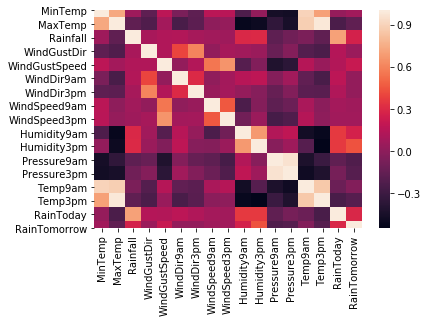

In [184]:
#Далее можно проводить корреляционный анализ (Методом Пирсона)
data.corr()
sns.heatmap(data.corr())

<h5>Проанализируем корреляционную матрицу.
Погода на завтрашний день коррелирует с Humidity3pm (44,2), это нам позволит произвести анализ. <br>
Так же слабо коррелирует с RainToday(29) и Rainfall(27), а так же WindGustSpeed(21), Pressure9am (-22) <br>
Чтобы уменьшить данные для рассчета, уберем данные до |20|<h5>

In [185]:
data = data.drop(columns=['MinTemp','MaxTemp','WindGustDir','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Temp9am','Temp3pm'],axis=1)

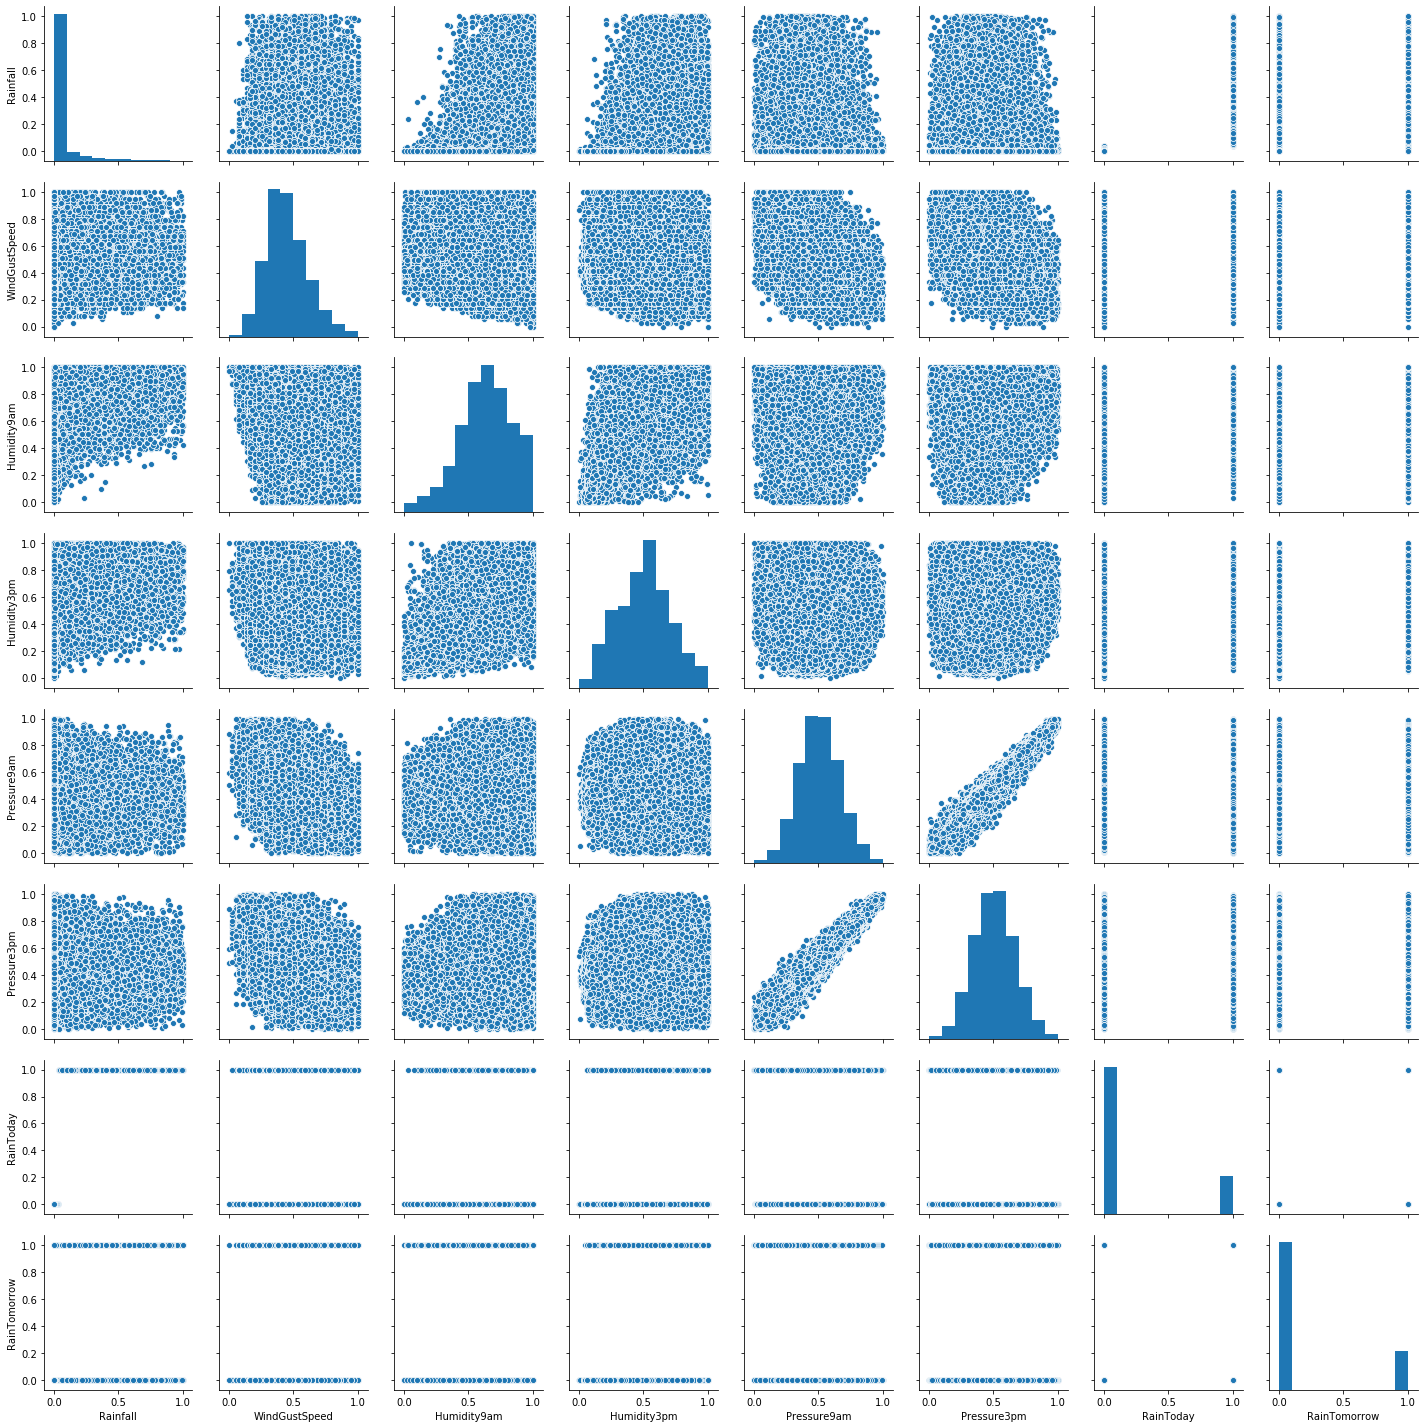

In [186]:
#Рассмотрим парные графики
sns.pairplot(data)

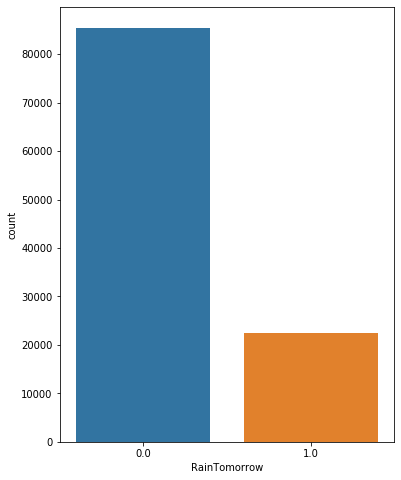

In [187]:
#Посмотрим на частоту дождей в нашем датасете
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=data)
plt.show()

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Humidity3pm')

Text(0, 0.5, 'RainTomorrow')

Text(0.5, 0, 'RainToday')

Text(0, 0.5, 'RainTomorrow')

Text(0.5, 0, 'Rainfall')

Text(0, 0.5, 'RainTomorrow')

Text(0.5, 0, 'Pressure9am')

Text(0, 0.5, 'RainTomorrow')

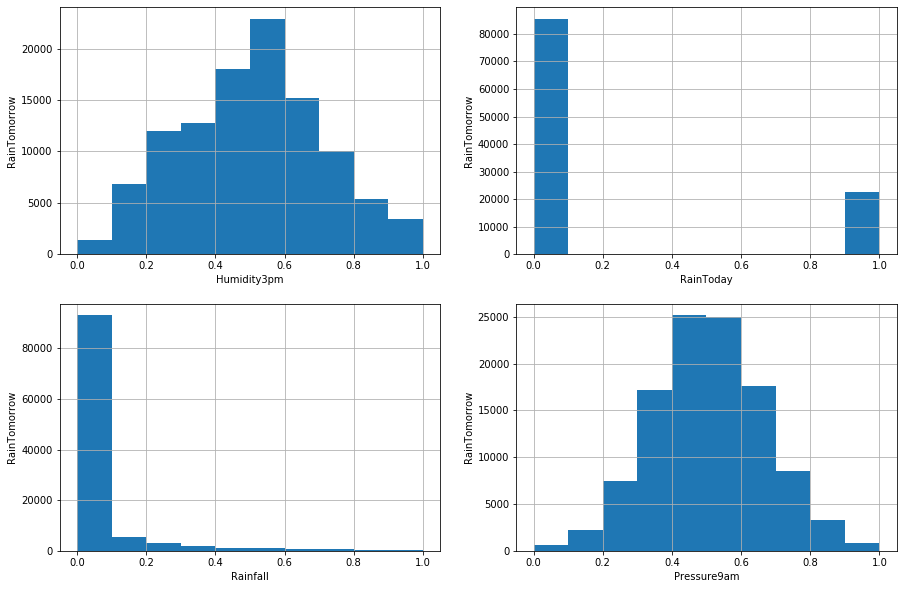

In [188]:
# Посмотрим некоторые зависимости
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.Humidity3pm.hist(bins=10)
fig.set_xlabel('Humidity3pm')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = data.RainToday.hist(bins=10)
fig.set_xlabel('RainToday')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = data.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = data.Pressure9am.hist(bins=10)
fig.set_xlabel('Pressure9am')
fig.set_ylabel('RainTomorrow')
#Можно заметить зависимости в параметрах

<h3>5. Далее выберем метрики для оценки наших моделей.<br>
Выберем метрики accuracy, confusion Matrix, precision.<br>
Данные метрики позволят определить точность прогноза, а так же проверить, в каких ситуациях программа дает ложные ответы<h3>

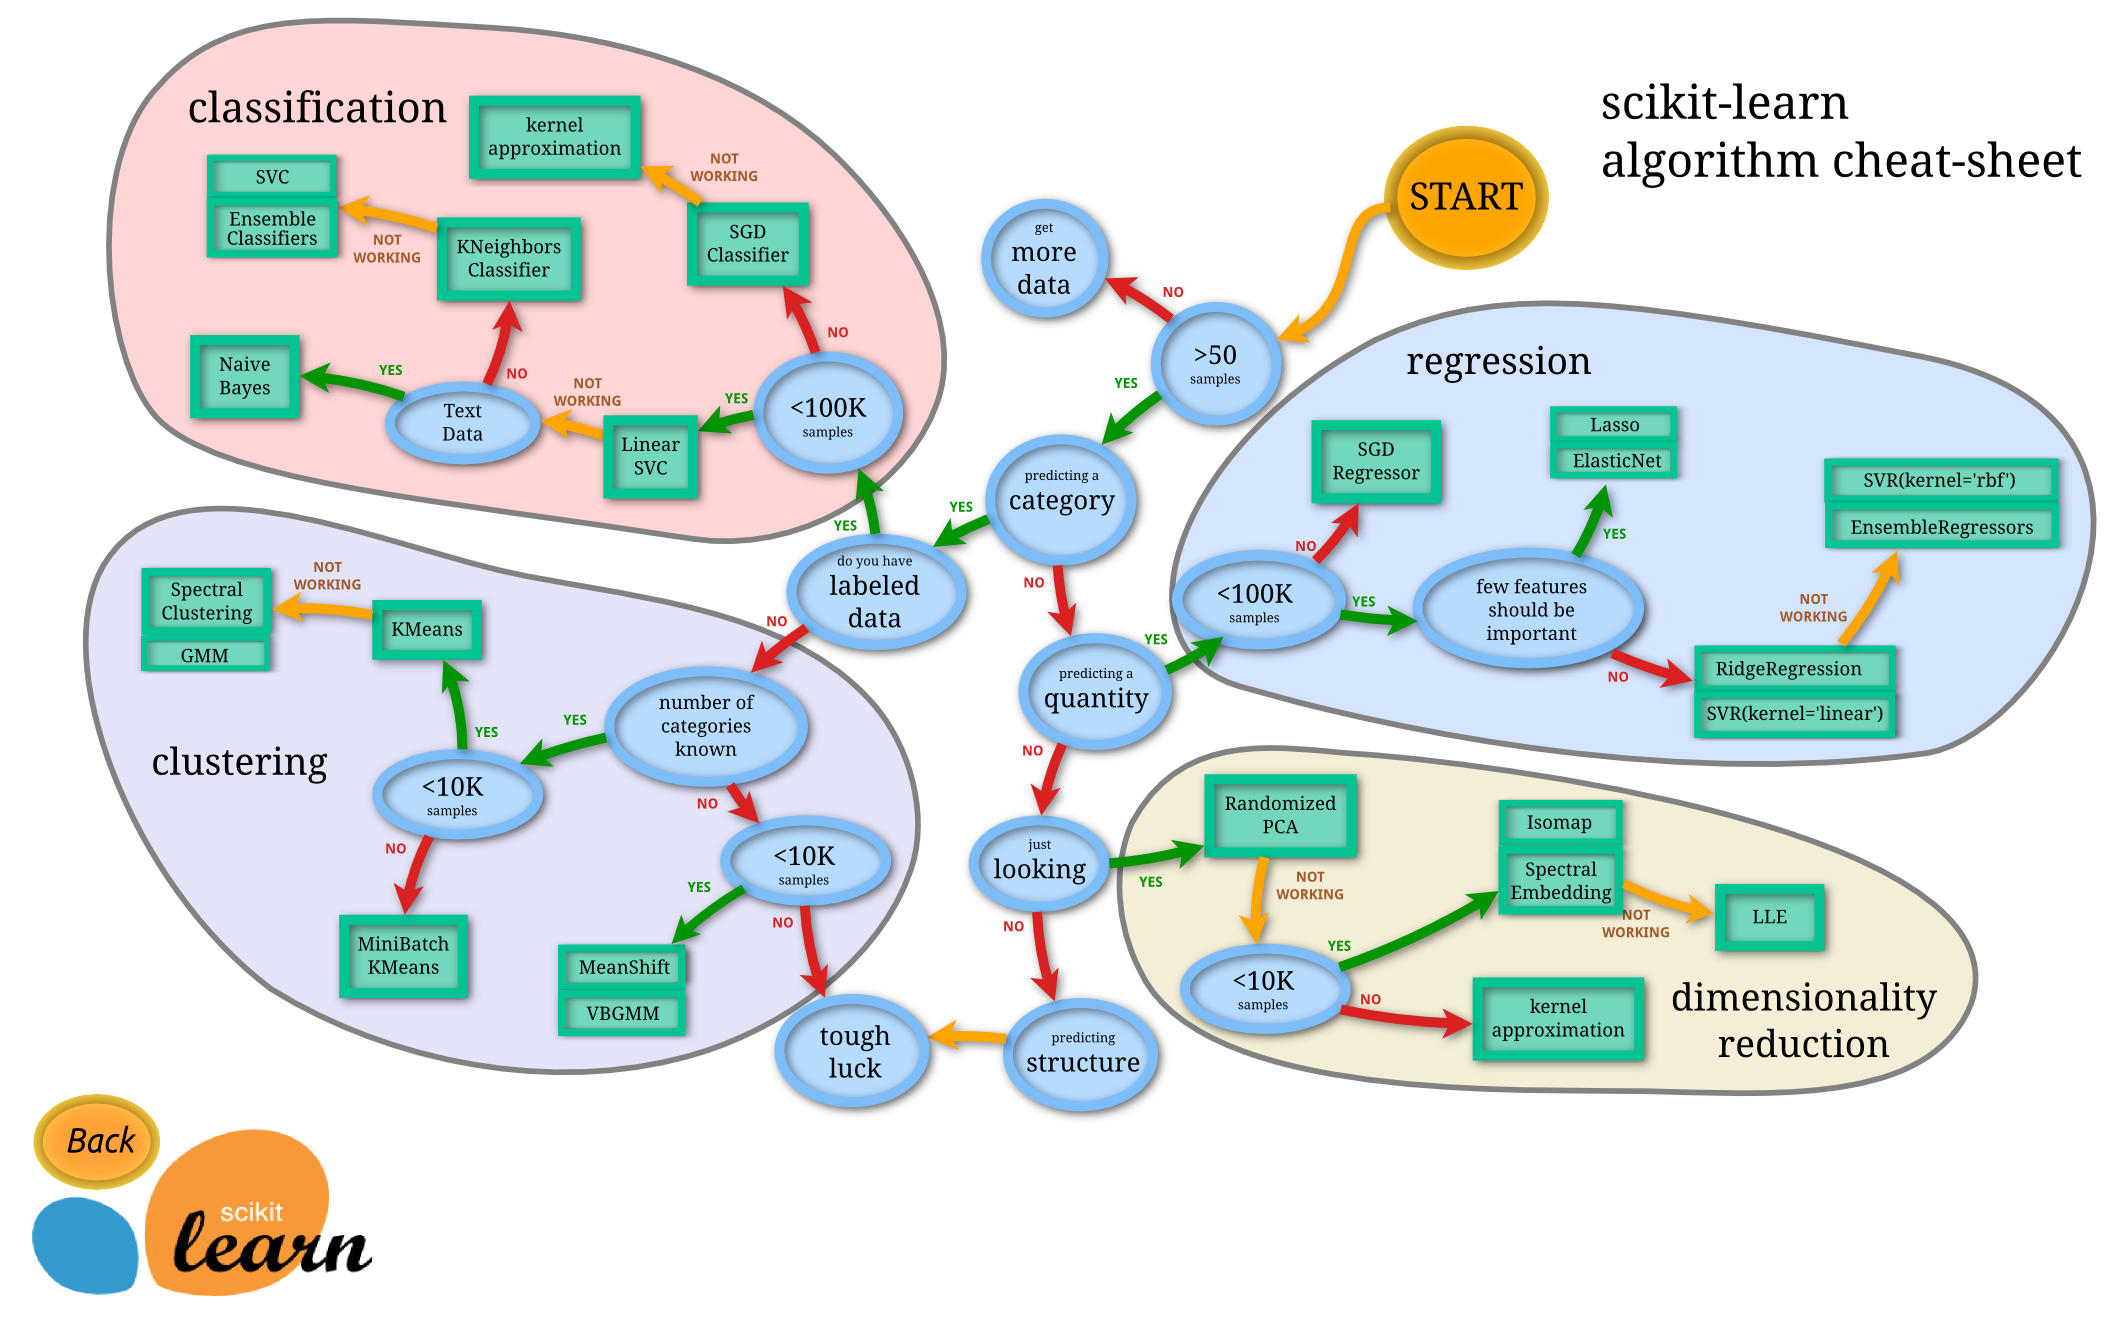

(107868, 8)

In [189]:
#6. Для подбора моделей для решения задач классификации и регрессии воспользуемся картой методов
Image("ml_map.png")
#Источник - https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
data.shape
#Даже несмотря на то, что количество данных превышает 100 000, можно использовать методы >100к, так как наше количество данных не сильно превышает это значение
#Задача с дождем требует решение задачи классификации, поэтому будем выбирать методы классификации.

<h3>6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.<h3>
<h5>Выберем методы KNeighbors<br>
DecisionTreeClassifier<br>
LinearSVC<br>
 Данные методы являются относительно быстрыми, а так же помогают получить решение совсем разными методами.<h5>

<h3>7. Формирование обучающей и тестовой выборки <br>
В данном примере разделим 70 к 30<h3>

In [190]:


features = data.drop(['RainTomorrow'], axis=1)
target_tmp = data['RainTomorrow']
target = pd.DataFrame({'RainTomorrow':target_tmp.index, 'RainTomorrow':target_tmp.values})
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=1)
X_train.shape
X_test.shape
Y_train.shape
Y_test.shape


(75507, 7)

(32361, 7)

(75507, 1)

(32361, 1)

<h3>8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки<br> 
 и оценка качества моделей на основе тестовой выборки.<h3>

In [234]:
def get_score(model,prediction):
    print("accuracy_score: ", accuracy_score(Y_test, prediction))
    print("precision_score: ", precision_score(Y_test, prediction))
    print("confusion_matrix: ")
    print(confusion_matrix(Y_test, prediction, labels=[0, 1]))

<h4> KNeighbors <h4>

In [244]:
cl0_0 = KNeighborsClassifier().fit(X_train, Y_train)
target0_0 = cl0_0.predict(X_test)
cl0_0
target0_0
get_score(cl0_0,target0_0)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

array([0., 0., 0., ..., 0., 0., 0.])

accuracy_score:  0.8342758258397454
precision_score:  0.6410517733387688
confusion_matrix: 
[[23853  1761]
 [ 3602  3145]]


<h4> DecisionTreeClassifier <h4>

In [252]:
cl1_0 = DecisionTreeClassifier(max_depth=None).fit(X_train, Y_train)
target1_0 = cl1_0.predict(X_test)
cl1_0
target1_0
get_score(cl1_0,target1_0)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

array([0., 1., 0., ..., 0., 1., 0.])

accuracy_score:  0.7770773461883131
precision_score:  0.46729233786244573
confusion_matrix: 
[[21811  3803]
 [ 3411  3336]]


<h4> LinearSVC<h4>

In [301]:
cl2_0 = LinearSVC(C=1.0, penalty='l1', dual=False, max_iter=10000, ).fit(X_train, Y_train)
target2_0 = cl2_0.predict(X_test)
cl2_0
target2_0
get_score(cl2_0,target2_0)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0)

array([0., 0., 0., ..., 0., 0., 0.])

accuracy_score:  0.846821791662804
precision_score:  0.7233033932135728
confusion_matrix: 
[[24505  1109]
 [ 3848  2899]]


<h3> 9. Подбор гиперпараметров для выбранных моделей. <h3>

<h4> KNeighbors <h4>

In [222]:
%%time

n_range = np.array(range(5,150,5))
tuned_parameters = [{'n_neighbors': n_range}]
print (tuned_parameters)
optimazer_0 = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv = 5).fit(X_train, Y_train)
print (optimazer_0.best_score_)
print (optimazer_0.best_params_)

[{'n_neighbors': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145])}]
0.8505966334247156
{'n_neighbors': 55}
Wall time: 17min 30s


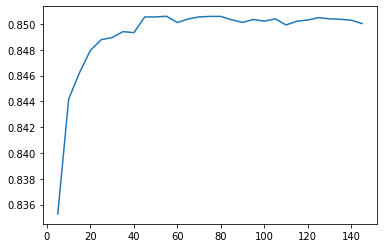

In [223]:
y_range=np.array(optimazer_0.cv_results_['mean_test_score'])
plt.plot(n_range, y_range)

<h4> DecisionTreeClassifier <h4>

In [257]:
%%time
#9 Подбор гиперпараметров для выбранных моделей.
n_range1 = np.array(range(1,50,1))
tuned_parameters1 = [{'max_depth': n_range1}]
optimazer_1 = GridSearchCV(DecisionTreeClassifier(), tuned_parameters1, cv = 5).fit(X_train, Y_train)
print (optimazer_1.best_score_)
print (optimazer_1.best_params_)

0.8484378931754671
{'max_depth': 7}
Wall time: 1min 7s


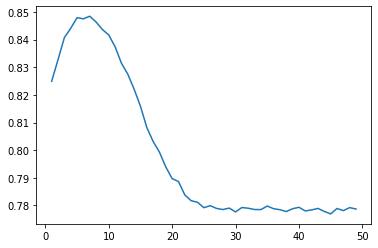

In [258]:
y_range1=np.array(optimazer_1.cv_results_['mean_test_score'])
plt.plot(n_range1, y_range1)

<h4> LinearSVC<h4>

In [304]:
%%time
#9 Подбор гиперпараметров для выбранных моделей.
#n_range2_1= [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100]
n_range2 = np.arange(0.1, 3, 0.2)
tuned_parameters2 = [{'C': n_range2}]
#tuned_parameters2_1 = [{'tol': n_range2_1}]
optimazer_2 = GridSearchCV(LinearSVC(), tuned_parameters2, cv = 5).fit(X_train, Y_train)
print (optimazer_2.best_score_)
print (optimazer_2.best_params_)

0.8479876037983234
{'C': 0.1}
Wall time: 2min 46s


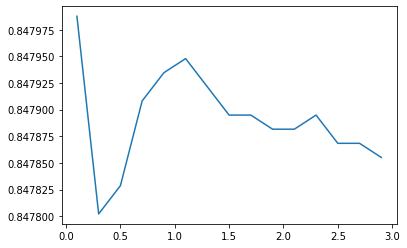

In [305]:
y_range2=np.array(optimazer_2.cv_results_['mean_test_score'])
plt.plot(n_range2, y_range2)

<h3>10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.<h3>

<h4> KNeighbors <h4>

In [261]:
%%time
cl0_1 = KNeighborsClassifier(n_neighbors=55).fit(X_train, Y_train)
target0_1 = cl0_1.predict(X_test)
print('База:')
get_score(cl0_0,target0_0)
print('Новые данные:')
get_score(cl0_1,target0_1)
#Несмотря на то, что основным параметром для поиска оптимальных гиперпараметров был accuracy_score, такой гиперпараметр заметно улучшил 
#precision_score, а в матрице увеличилось число положительных результатов (как ложно-положительных, так и положительных)

База:
accuracy_score:  0.8342758258397454
precision_score:  0.6410517733387688
confusion_matrix: 
[[23853  1761]
 [ 3602  3145]]
Новые данные:
accuracy_score:  0.847254411173944
precision_score:  0.7217305801376598
confusion_matrix: 
[[24482  1132]
 [ 3811  2936]]
Wall time: 16.1 s


<h4> DecisionTreeClassifier <h4>

In [262]:
cl1_1 = DecisionTreeClassifier(max_depth=7).fit(X_train, Y_train)
target1_1 = cl1_1.predict(X_test)
print('База:')
get_score(cl1_0,target1_0)
print('Новые данные:')
get_score(cl1_1,target1_1)
#Можно заметить, насколько сильно улучшились параметры, даже несмотря на достатоно низкую (по сравнению с ближайшими соседями) скорость перебора.

База:
accuracy_score:  0.7770773461883131
precision_score:  0.46729233786244573
confusion_matrix: 
[[21811  3803]
 [ 3411  3336]]
Новые данные:
accuracy_score:  0.8456166373103426
precision_score:  0.7391423108440317
confusion_matrix: 
[[24659   955]
 [ 4041  2706]]


<h4> LinearSVC<h4>

In [306]:
cl2_1 = LinearSVC(C=0.1).fit(X_train, Y_train)
target2_1 = cl2_1.predict(X_test)
print('База:')
get_score(cl2_0,target2_0)
print('Новые данные:')
get_score(cl2_1,target2_1)
#Как мы видим, новые параметры не сильно отличаются от исходных

База:
accuracy_score:  0.846821791662804
precision_score:  0.7233033932135728
confusion_matrix: 
[[24505  1109]
 [ 3848  2899]]
Новые данные:
accuracy_score:  0.847038101418374
precision_score:  0.7252444221609425
confusion_matrix: 
[[24518  1096]
 [ 3854  2893]]
